In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn import datasets
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_confusion_matrix

Source: https://www.youtube.com/watch?v=_clLO5QMW_4&t=196s

In [11]:
# Check versions
import sys
import sklearn
print(sys.version)
!python --version
print('numpy:', np.__version__)
print('sklearn:', sklearn.__version__)

3.9.6 (default, Nov 10 2023, 13:38:27) 
[Clang 15.0.0 (clang-1500.1.0.2.5)]
Python 3.11.4
numpy: 2.0.0
sklearn: 1.5.1


# SGDClassifier

In [12]:
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data.data,data.target)

In [17]:
#Pipeline, fit

#not sure why he used this formula for max_iter
max_iter = int(np.ceil(10**6/x_train.shape[0])) #max_iter needs to be an int

clf = make_pipeline(StandardScaler(),
                    linear_model.SGDClassifier(max_iter=max_iter,tol=1e-3))
clf.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=8929))])

In [18]:
# Predict, score
y_pred = clf.predict(x_test)
acu = metrics.accuracy_score(y_test,y_pred)
acu

0.9736842105263158

In [19]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 10]])

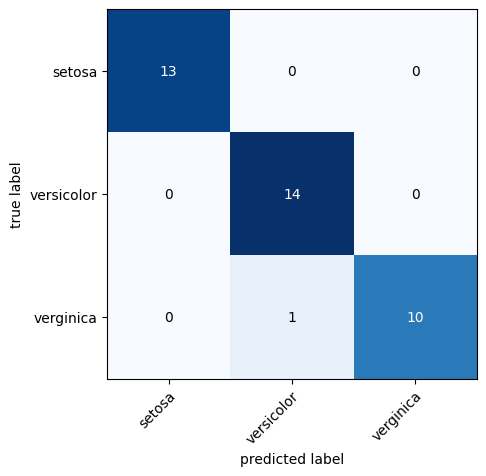

In [21]:
class_names = ['setosa','versicolor','verginica']

fig,ax = plot_confusion_matrix(conf_mat=cm,class_names = class_names)
plt.title = ('Confusion matrix')

#setosa: 13 actual data points, 13 predicted
#versicolor: 14 actual versicolor, but one was misclassified as verginica 
#verginica: 11 actual verginica, 1 misclassified as versicolor

# SGDRegressor

In [27]:
from sklearn.datasets import fetch_openml 
 
# an alternative to load_boston
data = fetch_openml(data_id=531)
print(data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [29]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target)
# Pipeline, fit
max_iter = int(np.ceil(10**6/x_train.shape[0]))
reg = make_pipeline(StandardScaler(),
                    linear_model.SGDRegressor(max_iter = max_iter))
reg.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=2639))])

In [30]:
y_pred = reg.predict(x_test)

#mean absolute error
mae = metrics.mean_absolute_error(y_test,y_pred)
#mean square error
mse = metrics.mean_squared_error(y_test,y_pred)
#root mean square error
rmse = metrics.root_mean_squared_error(y_test,y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 3.6052724960410014
MSE: 29.048465371713807
RMSE: 5.389662825419954


# Average SGDRegressor

In [31]:
reg = make_pipeline(StandardScaler(),
                    linear_model.SGDRegressor(max_iter = max_iter, average = True)) #Note the change here in average
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

#mean absolute error
mae = metrics.mean_absolute_error(y_test,y_pred)
#mean square error
mse = metrics.mean_squared_error(y_test,y_pred)
#root mean square error
rmse = metrics.root_mean_squared_error(y_test,y_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 3.5759088033604027
MSE: 30.992214942654954
RMSE: 5.567065200144054
